#### MOVIES DATA EDA AND CORRELATION ANALYSIS

In [17]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import plotly.express as px

In [18]:
movies = pd.read_csv("movies.csv")

In [19]:
#Getting to know the data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [20]:
movies.head(20)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   

                              released  score      votes            director  \
0        June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5          May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6        June 20, 1980 (United States)    7.9   188000.0         John Landis   
7    December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8        June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9         May 16, 1980 (United States)    7.0    10000.0         Walter Hill   
10   December 17, 1980 (United States)    6.1    18000.0      Buddy Van Horn   
11    October 26, 1984 (United States)    7.3    54000.0           Jamie Uys   
12   December 12, 1980 (United States)    5.3    30000.0       Robert Altman   
13  September 19, 1980 (United States)    7.7    49000.0      Robert Redford   
14       July 25, 1980 (United States)    7.1    37000.0      Brian De Palma   
15     October 3, 1980 (United States)    7.2    27000.0      Jeannot Szwarc   
16        May 16, 1980 (United States)    6.6    21000.0         Alan Parker   
17   December 19, 1980 (United States)    6.9    29000.0       Colin Higgins   
18    February 8, 1980 (United States)    6.8    66000.0      John Carpenter   
19   December 12, 1980 (United States)    6.8    26000.0      Sidney Poitier   

                     writer               star         country      budget  \
0              Stephen King     Jack Nicholson  United Kingdom  19000000.0   
1   Henry De Vere Stacpoole     Brooke Shields   United States   4500000.0   
2            Leigh Brackett        Mark Hamill   United States  18000000.0   
3              Jim Abrahams        Robert Hays   United States   3500000.0   
4        Brian Doyle-Murray        Chevy Chase   United States   6000000.0   
5             Victor Miller       Betsy Palmer   United States    550000.0   
6               Dan Aykroyd       John Belushi   United States  27000000.0   
7              Jake LaMotta     Robert De Niro   United States  18000000.0   
8              Jerry Sie

In [21]:
#Finding percentage of missing values
for col in movies:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [22]:
movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [23]:
#Treating missing values in numeric columns
continuous_cols = ['gross', 'budget', 'votes', 'score', 'runtime']

for col in continuous_cols:
    mean = movies[col].mean()
    movies[col].fillna(mean, inplace = True)

In [24]:
#Treating missing values in categorical columns
movies['rating'].fillna(np.random.choice(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14']), inplace= True)

In [25]:
movies.rating.unique()

array(['R', 'PG', 'G', 'TV-MA', 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-14'], dtype=object)

In [26]:
#Correcting the year of release
movies['correct_year_released'] = movies.released.str.extract(r'(\d{4})')

In [27]:
movies.drop(columns= 'year', inplace = True)

In [28]:
#Checking for duplicates
movies.duplicated().sum()

0

In [29]:
#Changing data types
movies["votes"] = movies["votes"].astype('int64')
movies["budget"] = movies["budget"].astype('int64')
movies["gross"] = movies["gross"].astype('int64')
movies["runtime"] = movies["runtime"].astype('int64')

In [30]:
pd.set_option('display.max_rows', None)

#### Exploratory Data Analysis

In [31]:
ratings = movies.rating.value_counts()*100/movies.shape[0]
formatted_ratings = ratings.apply(lambda x: f'{x:0.2f}%')
formatted_ratings

rating
R            48.21%
PG-13        27.54%
PG           16.33%
Not Rated     3.69%
G             2.00%
TV-MA         1.12%
Unrated       0.68%
NC-17         0.30%
TV-PG         0.07%
X             0.04%
Approved      0.01%
TV-14         0.01%
Name: count, dtype: object

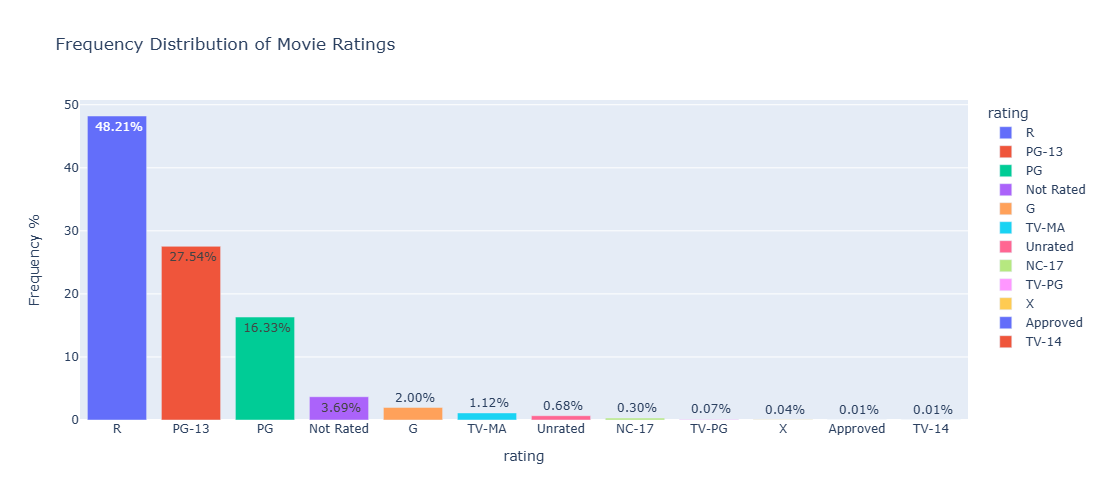

In [32]:
px.bar(data_frame= ratings, x= ratings.index, y= ratings*100/sum(ratings), labels = {'index':'Rating', 'y':'Frequency %'},
           title= 'Frequency Distribution of Movie Ratings', text = ratings.apply(lambda x: f"{x / sum(ratings) * 100: 0.2f}%"),
            color=ratings.index, width = 900, height = 500, template= 'plotly')

In [33]:
genre = movies.genre.value_counts()*100/movies.shape[0]
genre_pct= genre.apply(lambda x: f'{x: 0.2f}%')
genre_pct

genre
Comedy        29.28%
Action        22.24%
Drama         19.80%
Crime          7.19%
Biography      5.78%
Adventure      5.57%
Animation      4.41%
Horror         4.20%
Fantasy        0.57%
Mystery        0.26%
Thriller       0.21%
Family         0.14%
Sci-Fi         0.13%
Romance        0.13%
Western        0.04%
Musical        0.03%
Music          0.01%
History        0.01%
Sport          0.01%
Name: count, dtype: object

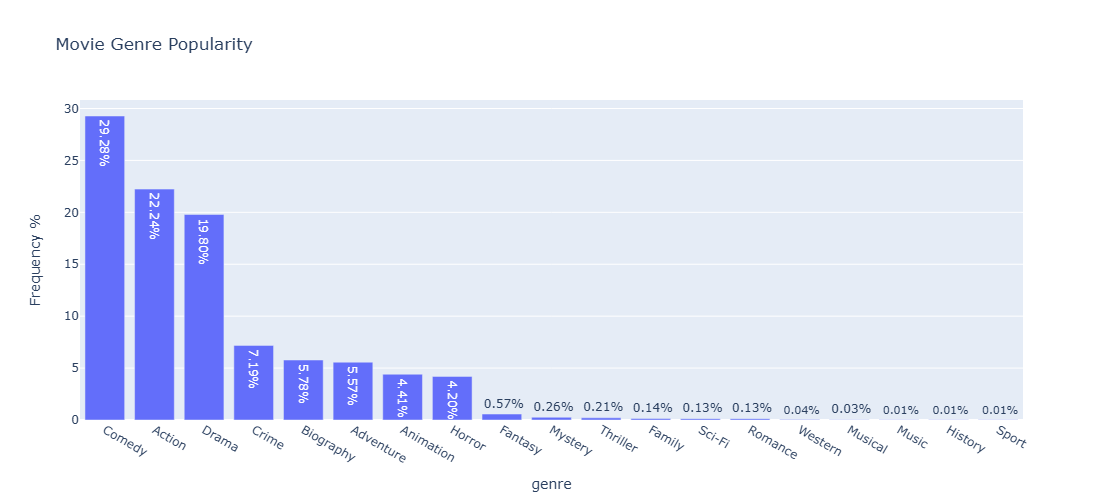

In [34]:
px.bar(data_frame= genre, x= genre.index, y= genre*100/sum(genre), labels = {'index':'Movie Genre', 'y':'Frequency %'},
           title= 'Movie Genre Popularity', text = genre.apply(lambda x: f"{x / sum(genre) * 100: 0.2f}%"),
             width = 900, height = 500, template= 'plotly')

In [35]:
year = movies.correct_year_released.value_counts().sort_index()
year.head(10)

correct_year_released
1980     80
1981    103
1982    128
1983    145
1984    157
1985    183
1986    211
1987    196
1988    199
1989    200
Name: count, dtype: int64

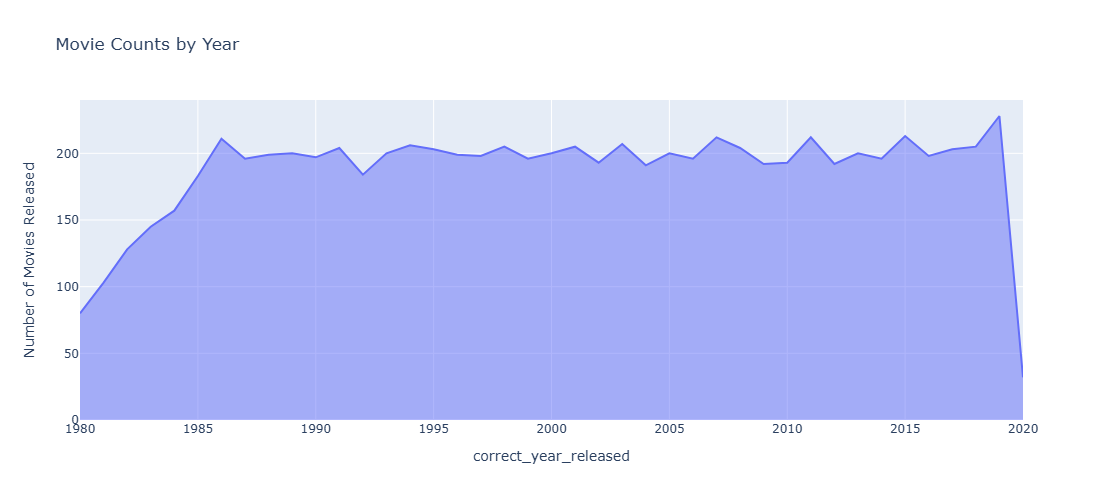

In [36]:
a = px.area(data_frame= year, x= year.index, y=year, labels = {'index':'Year', 'y':'Number of Movies Released'},
           title= 'Movie Counts by Year',
             width = 800, height = 500, template= 'plotly' )
a.update_layout(xaxis=dict(tickvals=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
                        ticktext = ['1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']))

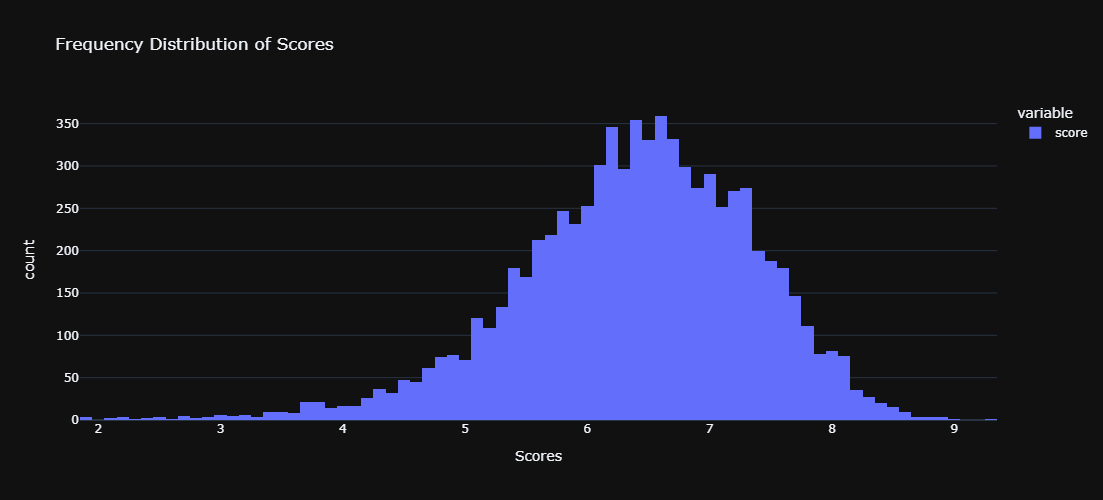

In [37]:
px.histogram(data_frame= movies.score, width = 700, height = 500, title= 'Frequency Distribution of Scores', template= 'plotly_dark',
            labels= {'value':'Scores'})

In [38]:
top_directors = movies.director.value_counts().head(10)
top_directors

director
Woody Allen          38
Clint Eastwood       31
Directors            28
Steven Spielberg     27
Ron Howard           24
Steven Soderbergh    23
Ridley Scott         23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Name: count, dtype: int64

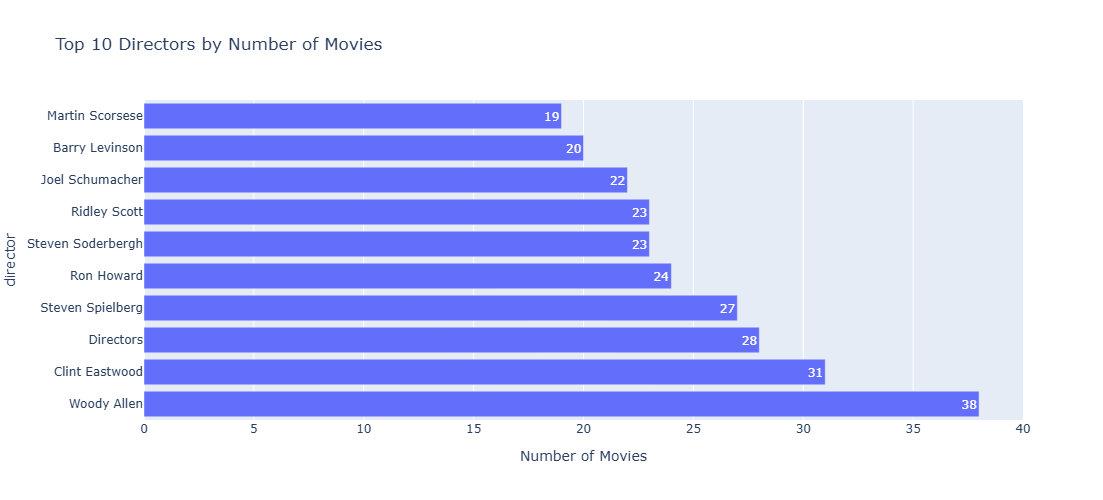

In [39]:
px.bar(data_frame= top_directors, x= top_directors, y=top_directors.index, labels = {'y':'Movie Directors', 'x':'Number of Movies'},
           title= 'Top 10 Directors by Number of Movies',
             width = 800, height = 500, template= 'plotly', text = top_directors, orientation= 'h' )

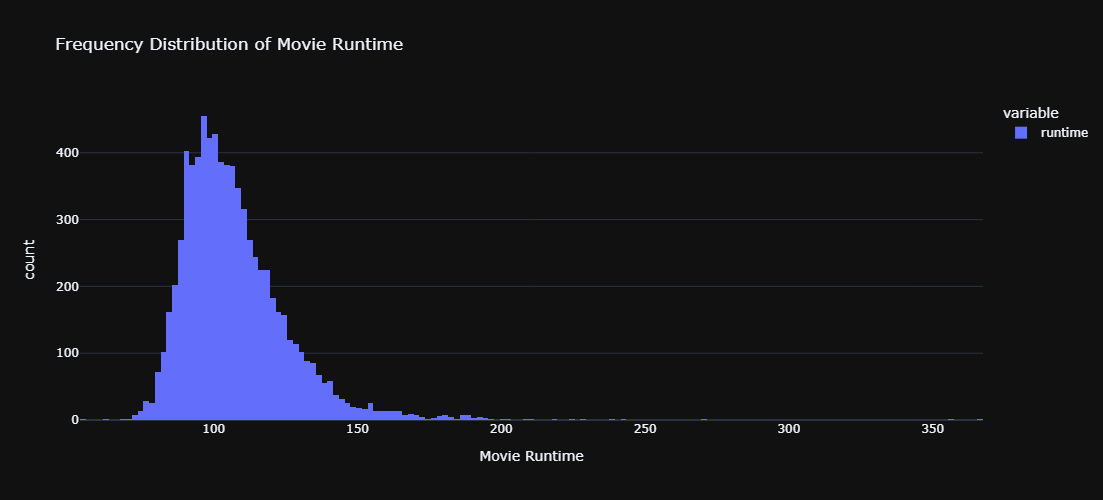

In [40]:
px.histogram(data_frame= movies.runtime, width = 800, height = 500, template= 'plotly_dark', 
              labels = {'count':'Frequency', 'value':'Movie Runtime'},
           title= 'Frequency Distribution of Movie Runtime', )

##### Top 10 movies based on scores

In [41]:
top_ten_movies = movies.loc[:, ['name', 'score']].sort_values(by = 'score', ascending = False).head(10)
top_ten_movies

name  score
2443                           The Shawshank Redemption    9.3
5243                                    The Dark Knight    9.0
2444                                       Pulp Fiction    8.9
4245      The Lord of the Rings: The Return of the King    8.9
2247                                   Schindler's List    8.9
2445                                       Forrest Gump    8.8
5643                                          Inception    8.8
3845  The Lord of the Rings: The Fellowship of the Ring    8.8
3444                                         Fight Club    8.8
1643                                         Goodfellas    8.7

##### Top 10 Companies by Average Gross Revenue

In [42]:
top_ten_companies = movies.groupby('company')['gross'].mean().sort_values( ascending = False).head(10).reset_index()
top_ten_companies

company         gross
0              Marvel Studios  1.255466e+09
1  Illumination Entertainment  1.097122e+09
2      Fairview Entertainment  9.665549e+08
3                         B24  8.806815e+08
4        Avi Arad Productions  8.560852e+08
5    Chris Morgan Productions  7.590569e+08
6                   Jolie Pas  7.584118e+08
7                Coco Cartoon  7.262641e+08
8                   Lucasfilm  7.185352e+08
9        Marvel Entertainment  7.144215e+08

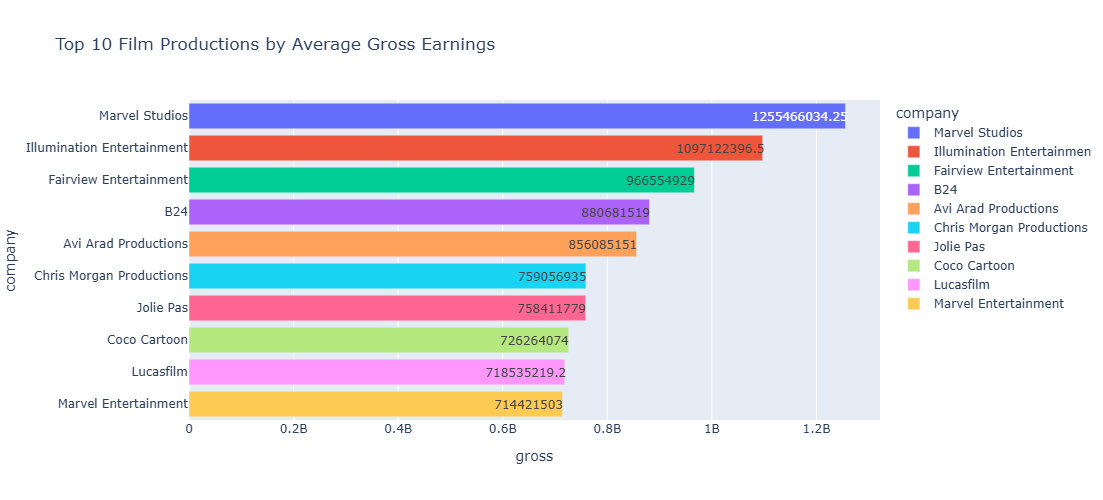

In [43]:
px.bar(data_frame= top_ten_companies, x= top_ten_companies.gross, y=top_ten_companies.company, 
       labels = {'y':'Film Production', 'x':'Average Gross Earnings'},
           title= 'Top 10 Film Productions by Average Gross Earnings',
             width = 900, height = 500, template= 'plotly', orientation= 'h', color = 'company', text = top_ten_companies.gross )

In [44]:
b = movies.groupby('correct_year_released', as_index= False)['genre'].value_counts()
filter = b.groupby('correct_year_released')['count'].nlargest(3).droplevel(0).index
b = b.iloc[filter]
b = b.loc[b.correct_year_released >='2017', :]
b

correct_year_released   genre  count
375                  2017  Action     53
376                  2017   Drama     45
377                  2017  Comedy     33
384                  2018  Action     52
385                  2018   Drama     37
386                  2018  Comedy     34
393                  2019  Action     60
394                  2019   Drama     49
395                  2019  Comedy     43
406                  2020   Drama     11
407                  2020  Action      7
408                  2020  Comedy      4

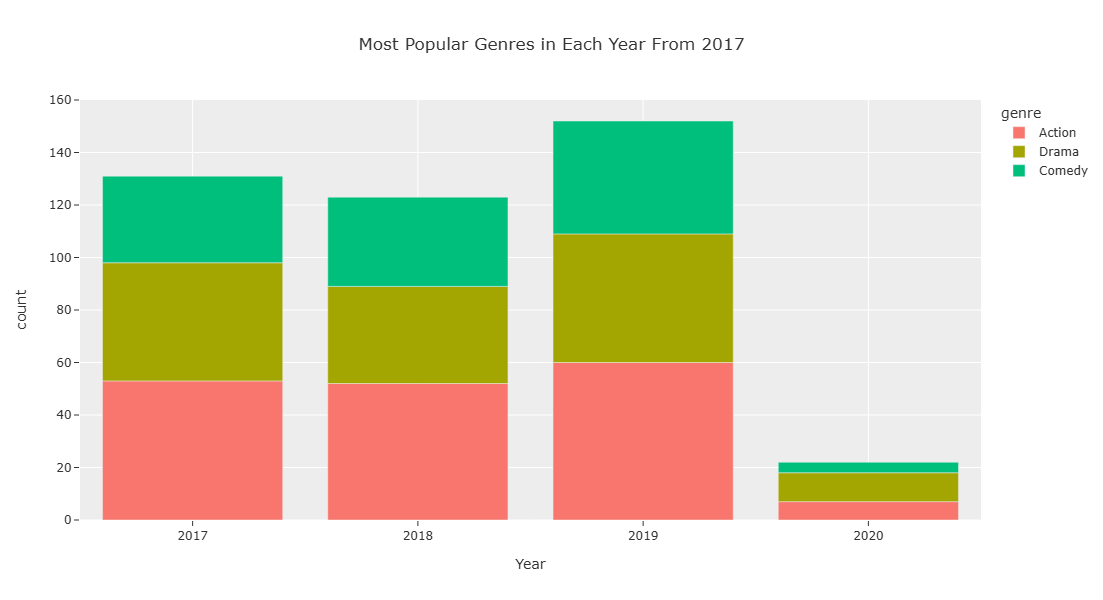

In [45]:
px.bar(data_frame= b, x= 'correct_year_released', y = 'count', color = 'genre', width = 500, height = 600, template ='ggplot2',
                      labels= {'correct_year_released':'Year'}, title= 'Most Popular Genres in Each Year From 2017')

#### Correlation Analysis: What factors influence Gross Earnings of a Film?

In [46]:
#Seeing correlation between numeric columns
correlation = movies.select_dtypes(['int64', 'float64']).corr()
correlation

score     votes    budget     gross   runtime
score    1.000000  0.409182  0.064541  0.182868  0.399335
votes    0.409182  1.000000  0.421007  0.628713  0.309168
budget   0.064541  0.421007  1.000000  0.711270  0.265289
gross    0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.399335  0.309168  0.265289  0.241336  1.000000

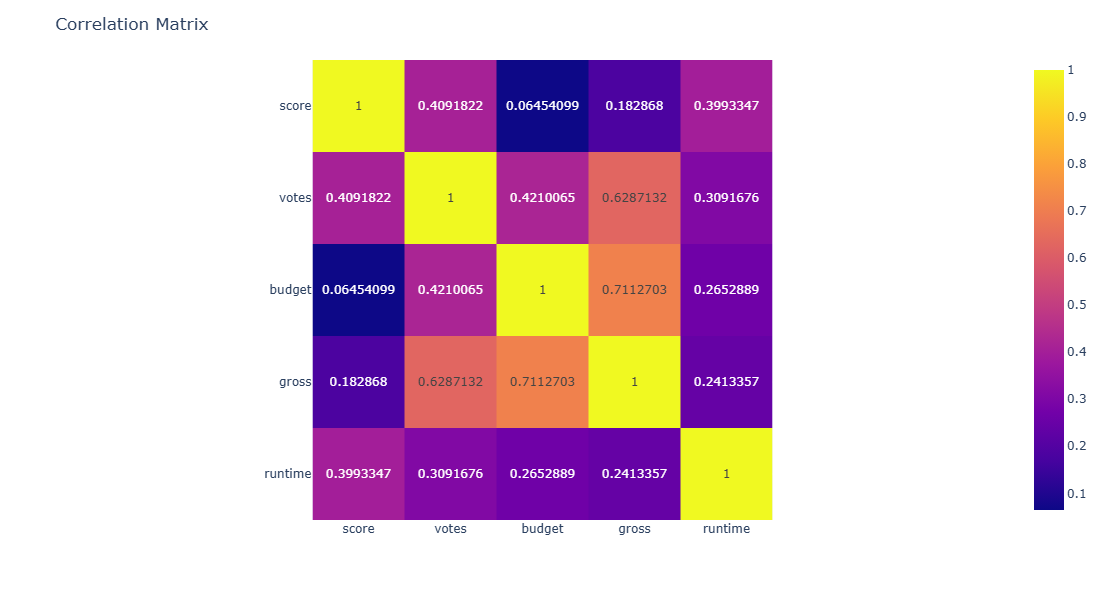

In [47]:
import plotly.express as px

fig = px.imshow(correlation, text_auto=True)
fig.update_layout(title='Correlation Matrix', width = 800, height =600)

From the correlation matrix, we can tell that gross earnings has a strong positive correlation with budget(0.74) and votes(0.63)

In [53]:
#Seeing the correlation of categorical columns with gross earnings
movies1 = movies
for col in movies1:
    if movies1[col].dtype == 'object':
        movies1[col] = movies[col].astype('category')
        movies1[col] = movies[col].cat.codes
movies1.head()

name  rating  genre  released  score    votes  director  writer  star  \
0  6587       6      6      1705    8.4   927000      2589    4014  1047   
1  5573       6      1      1492    5.8    65000      2269    1632   327   
2  5142       4      0      1771    8.7  1200000      1111    2567  1745   
3   286       4      4      1492    7.7   221000      1301    2000  2246   
4  1027       6      4      1543    7.3   108000      1054     521   410   

   country    budget      gross  company  runtime  correct_year_released  
0       54  19000000   46998772     2319      146                      0  
1       55   4500000   58853106      731      104                      0  
2       55  18000000  538375067     1540      124                      0  
3       55   3500000   83453539     1812       88                      0  
4       55   6000000   39846344     1777       98                      0

In [49]:
correlation_matrix2 = movies1.corr()
correlation_matrix2

name    rating     genre  released     score  \
name                   1.000000 -0.013032  0.016355 -0.011311  0.017095   
rating                -0.013032  1.000000  0.131737  0.024140  0.016998   
genre                  0.016355  0.131737  1.000000  0.029822  0.027959   
released              -0.011311  0.024140  0.029822  1.000000  0.042779   
score                  0.017095  0.016998  0.027959  0.042779  1.000000   
votes                  0.013086  0.005046 -0.145276  0.016094  0.409182   
director               0.009079  0.014205 -0.015258 -0.001478  0.009559   
writer                 0.009081 -0.004754  0.006567 -0.002404  0.019410   
star                   0.006472  0.002146 -0.005477  0.015777 -0.001609   
country               -0.010737  0.006740 -0.037615 -0.020427 -0.133343   
budget                 0.020368 -0.156236 -0.310566  0.012263  0.064541   
gross                  0.005466 -0.130655 -0.230267  0.001636  0.182868   
company                0.009211 -0.093812 -0.071067 -0.010474  0.001030   
runtime                0.010386  0.063854 -0.052701  0.000877  0.399335   
correct_year_released  0.010225  0.032909 -0.078210 -0.003775  0.106233   

                          votes  director    writer      star   country  \
name                   0.013086  0.009079  0.009081  0.006472 -0.010737   
rating                 0.005046  0.014205 -0.004754  0.002146  0.006740   
genre                 -0.145276 -0.015258  0.006567 -0.005477 -0.037615   
released               0.016094 -0.001478 -0.002404  0.015777 -0.020427   
score                  0.409182  0.009559  0.019410 -0.001609 -0.133343   
votes                  1.000000  0.000260  0.000891 -0.019277  0.073622   
director               0.000260  1.000000  0.299067  0.039234  0.017490   
writer                 0.000891  0.299067  1.000000  0.027245  0.015343   
star                  -0.019277  0.039234  0.027245  1.000000 -0.012998   
country                0.073622  0.017490  0.015343 -0.012998  1.000000   
budget                 0.421007 -0.010364 -0.033216 -0.016628  0.039000   
gross                  0.628713 -0.014272 -0.023210 -0.002682  0.089949   
company                0.133129  0.004404  0.005646  0.012442  0.095548   
runtime                0.309168  0.017623 -0.003512  0.010169 -0.078287   
correct_year_released  0.218161 -0.020385 -0.008391 -0.027606 -0.079009   

                         budget     gross   company   runtime  \
name                   0.020368  0.005466  0.009211  0.010386   
rating                -0.156236 -0.130655 -0.093812  0.063854   
genre                 -0.310566 -0.230267 -0.071067 -0.052701   
released               0.012263  0.001636 -0.010474  0.000877   
score                  0.064541  0.182868  0.001030  0.399335   
votes                  0.421007  0.628713  0.133129  0.309168   
director              -0.010364 -0.014272  0.004404  0.017623   
writer                -0.033216 -0.023210  0.005646 -0.003512   
star                  -0.016628 -0.002682  0.012442  0.010169   
country                0.039000  0.089949  0.095548 -0.078287   
budget                 1.000000  0.711270  0.144851  0.265289   
gross                  0.711270  1.000000  0.152694  0.241336   
company                0.144851  0.152694  1.000000  0.034391   
runtime                0.265289  0.241336  0.034391  1.000000   
correct_year_released  0.259419  0.245342 -0.014144  0.120547   

                       correct_year_released  
name                                0.010225  
rating                              0.032909  
genre                              -0.078210  
released                           -0.003775  
score                               0.106233  
votes                               0.218161  
director                           -0.020385  
writer                             -0.008391  
star                               -0.027606  
country                            -0.079009  
budget                              0.259419  
gross               

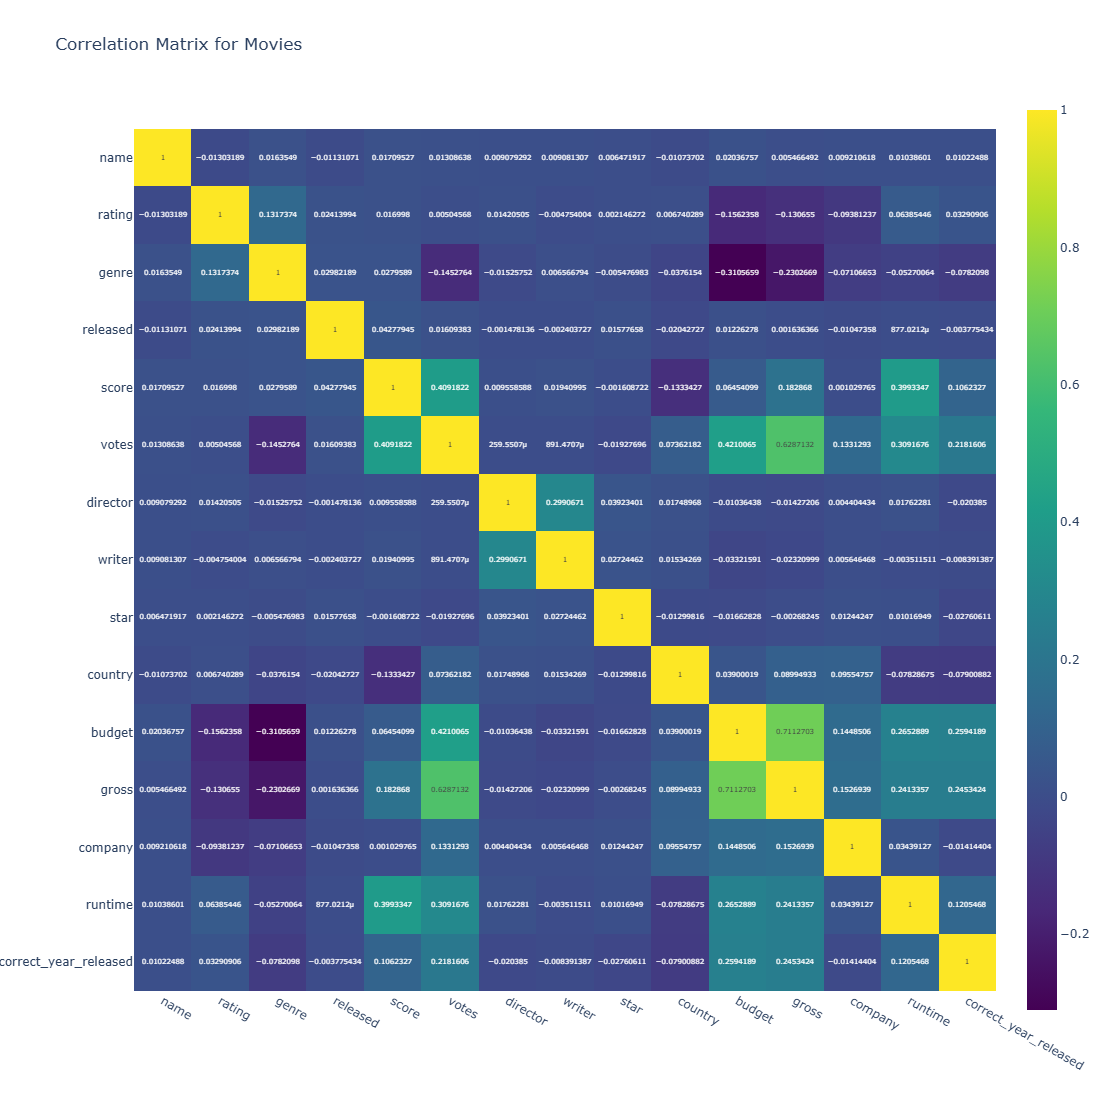

In [50]:
px.imshow(correlation_matrix2, width = 1100, height = 1100, text_auto= True, title = 'Correlation Matrix for Movies',
         color_continuous_scale = 'viridis')

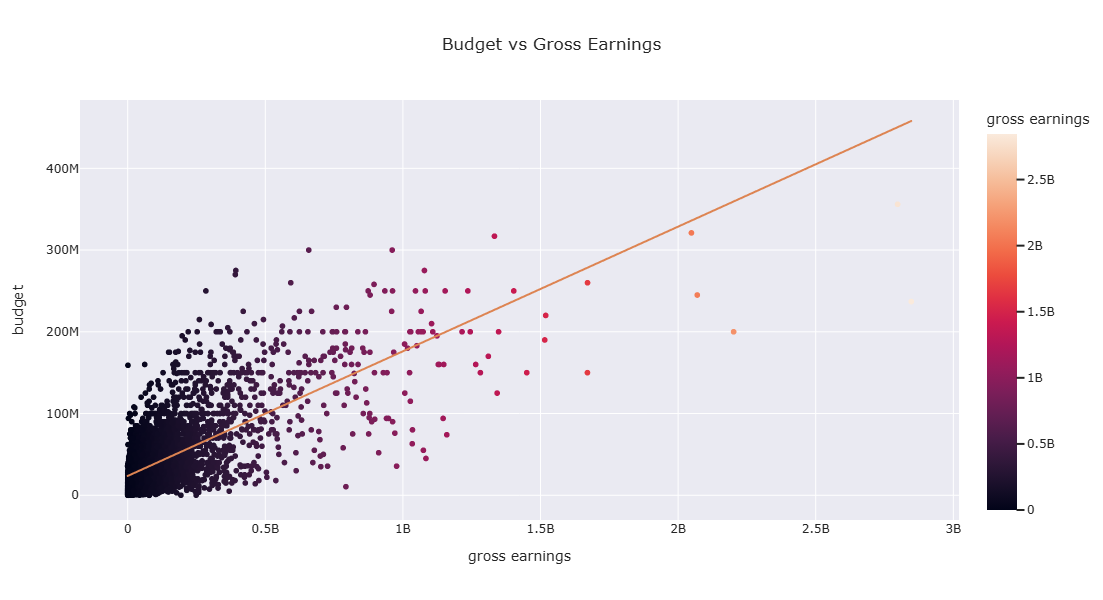

In [51]:
#Understanding the relationship between gross earnings and budget
px.scatter(data_frame=movies, x= movies.gross, y= movies.budget, trendline = 'ols', color = movies.gross, 
           template = 'seaborn', width = 800, height = 600, title = 'Budget vs Gross Earnings', labels= {'gross':'gross earnings'})

The more the budget increases, the more is the gross earnings expected from a film

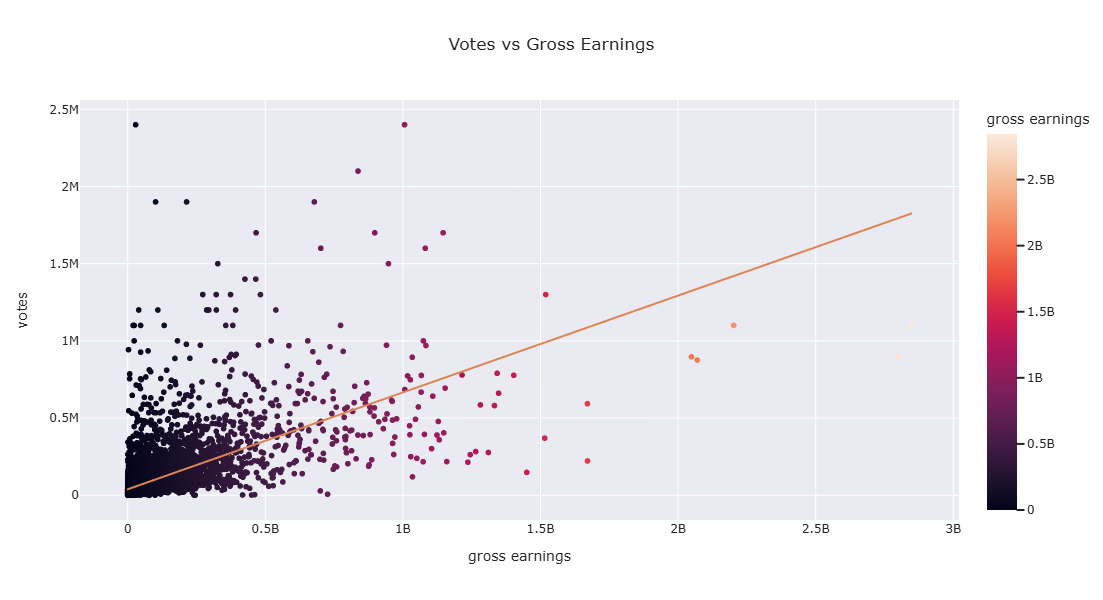

In [52]:
#Understanding the relationship between votes and gross earnings
px.scatter(data_frame=movies, x= movies.gross, y= movies.votes, trendline = 'ols', color = movies.gross, 
           template = 'seaborn', width = 800, height = 600, title = 'Votes vs Gross Earnings', labels= {'gross':'gross earnings'})

As expected, if a movies garners more votes(i.e, the number of people who have watched the movie), its gross earnings increase.